In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from imblearn.over_sampling import SMOTE

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score, cohen_kappa_score, fbeta_score
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt

In [2]:
df = pd.read_csv('./healthcare-dataset-stroke-data.csv')

In [3]:
df_dum = pd.get_dummies(df.drop(columns=['id']), columns=['gender', 'hypertension', 'heart_disease', 'ever_married', 
                                     'work_type', 'Residence_type', 'smoking_status'])

X = df_dum.drop('stroke', axis=1)
y = df_dum.stroke.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=df_dum.stroke.values)

In [4]:
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
X_train["bmi"] = imp.fit_transform(X_train[["bmi"]]).ravel()

/Users/koraykarakas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
oversample = SMOTE(random_state=0)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [6]:
# Random Forest

rf = RandomForestClassifier(random_state=0, max_depth=14, min_samples_leaf=1, min_samples_split=2, n_estimators=9)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, n_estimators=9, random_state=0)

In [7]:
X_test["bmi"] = imp.transform(X_test[["bmi"]]).ravel()

/Users/koraykarakas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
y_pred = rf.predict(X_test)

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1216
           1       0.12      0.05      0.07        62

    accuracy                           0.94      1278
   macro avg       0.54      0.52      0.52      1278
weighted avg       0.91      0.94      0.92      1278



In [10]:
print(classification_report(y_train, rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3645
           1       1.00      0.99      0.99      3645

    accuracy                           0.99      7290
   macro avg       0.99      0.99      0.99      7290
weighted avg       0.99      0.99      0.99      7290



In [11]:
print("Accuracies:")
print('test set', accuracy_score(y_test, y_pred))
print('train set', accuracy_score(y_train, rf.predict(X_train)))

Accuracies:
test set 0.9366197183098591
train set 0.994238683127572


In [12]:
params = {'n_estimators': [5, 6, 7, 8, 9, 10], 'max_depth': [4, 6, 8, 10, 12, 14], 
          'min_samples_split': [1, 2, 6, 10], 'min_samples_leaf': [1, 2, 6, 10]}


gs = GridSearchCV(rf, params, scoring='f1', cv=3,  n_jobs=-1, verbose=10)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


/Users/koraykarakas/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
 0.87277109 0.88500659 0.87960993 0.88583351 0.89127779 0.88871886
 0.87277109 0.88500659 0.88247854 0.88766138 0.89201514 0.88815703
 0.87431585 0.88516768 0.88478011 0.88523776 0.89053724 0.88725883
        nan        nan        nan        nan        nan        nan
 0.87291785 0.88467444 0.87960993 0.88328195 0.88867332 0.88615664
 0.87291785 0.88467444 0.882627   0.88525888 0.88941068 0.88559481
 0.87435395 0.88498354 0.88467167 0.88855316 0.89367981 0.887358
        nan        nan        nan        nan        nan        nan
 0.87402832 0.88449222 0.88464108 0.88842559 0.89248033 0.88494209
 0.87402832 0.88449222 0.88464108 0.88842559 0.89248033 0.88494209
 0.87402832 0.88449222 0.88464108 0.88842559 0.89248033 0.88494209
        nan        nan        nan   

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=14, n_estimators=9,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 12, 14],
                         'min_samples_leaf': [1, 2, 6, 10],
                         'min_samples_split': [1, 2, 6, 10],
                         'n_estimators': [5, 6, 7, 8, 9, 10]},
             scoring='f1', verbose=10)

In [13]:
gs.best_params_

{'max_depth': 14,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 9}

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

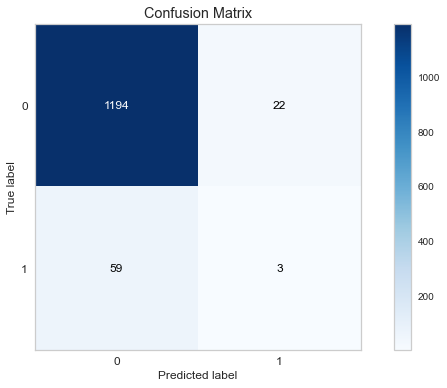

In [14]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(12, 6))

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

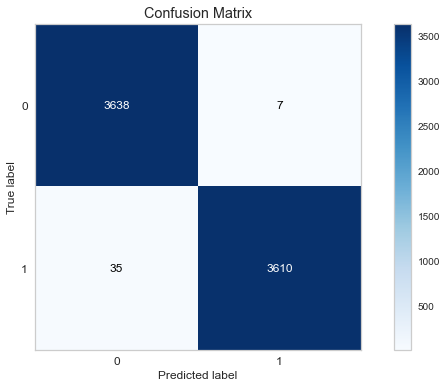

In [15]:
skplt.metrics.plot_confusion_matrix(y_train, rf.predict(X_train), figsize=(12, 6))

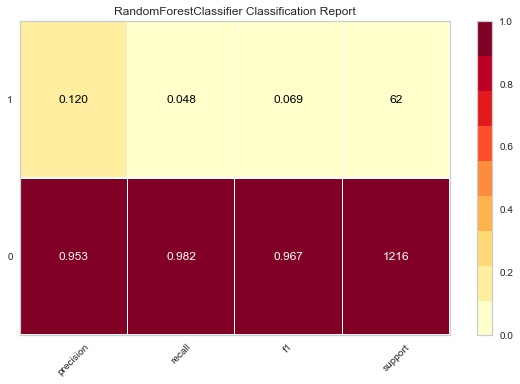

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [16]:
visualizer = ClassificationReport(rf, support=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [17]:
print('train set', fbeta_score(y_train, rf.predict(X_train), beta=2.0))
print('test set', fbeta_score(y_test, y_pred, beta=2.0))

train set 0.9919217453426388
test set 0.054945054945054944


In [18]:
print('train set', cohen_kappa_score(y_train, rf.predict(X_train)))
print('test set', cohen_kappa_score(y_test, y_pred))

train set 0.988477366255144
test set 0.04226264271043434


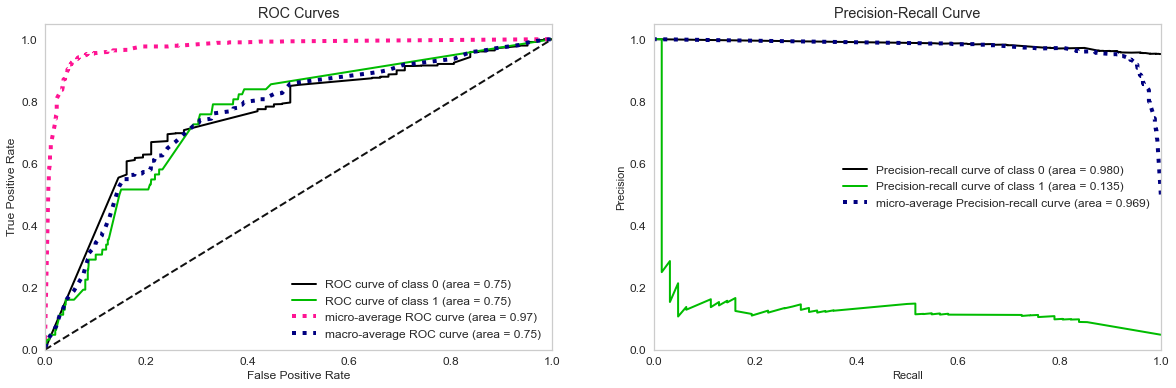

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
skplt.metrics.plot_roc(y_test, rf.predict_proba(X_test), figsize=(10, 6), ax=ax1)
skplt.metrics.plot_precision_recall(y_test, rf.predict_proba(X_test), figsize=(10, 6), ax=ax2)
ax1.grid()
ax2.grid()